In [4]:
import pandas as pd
import networkx as nx

facebook = pd.read_csv(
    	"facebook_combined.txt",
    	#compression="gzip",
    	sep=" ",
    	names=["start_node", "end_node"],
	)

G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

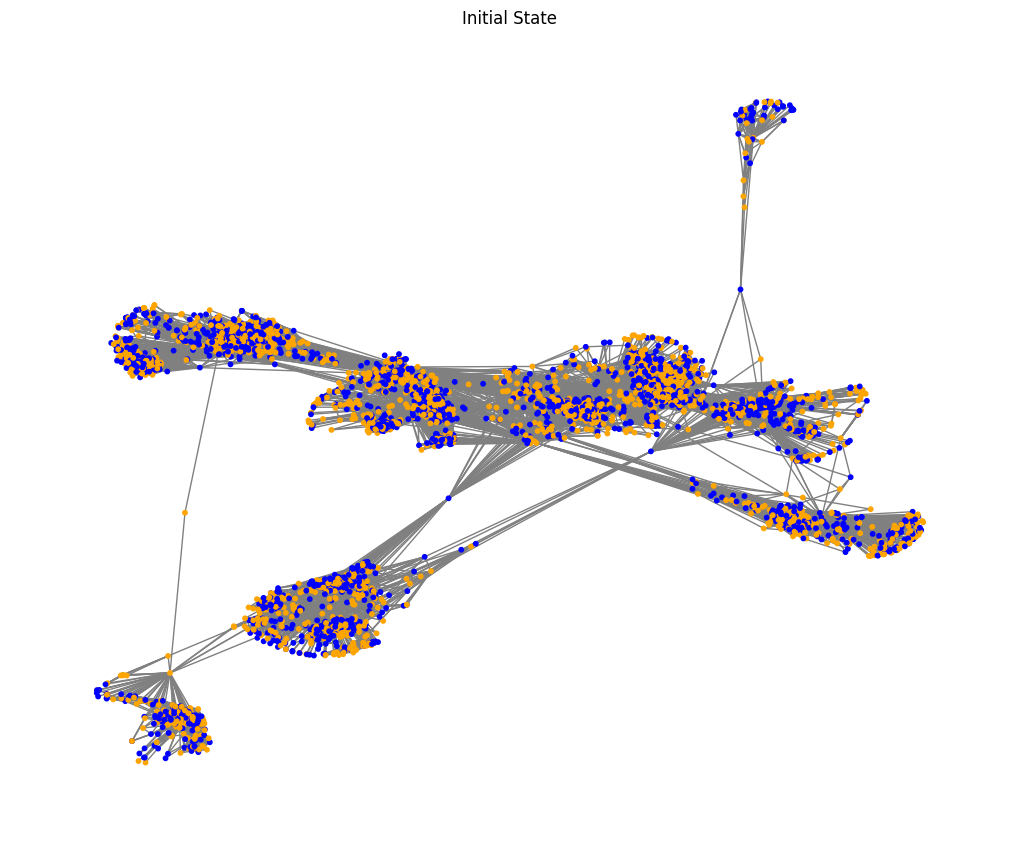

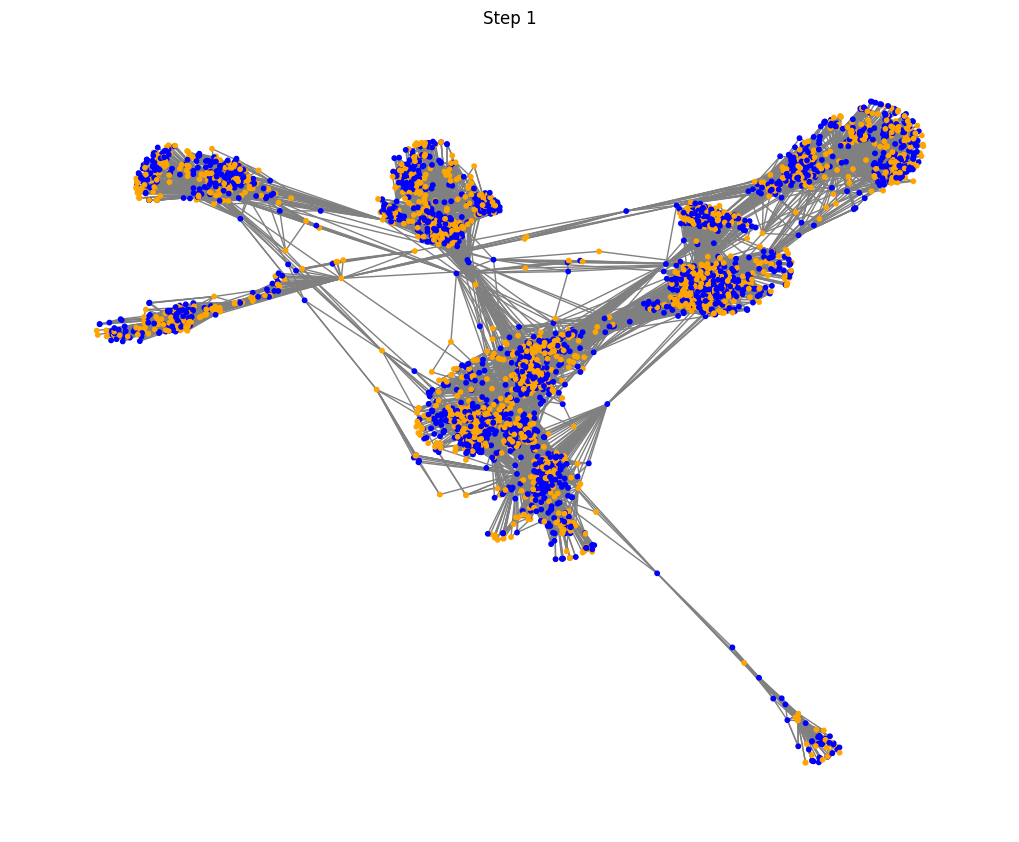

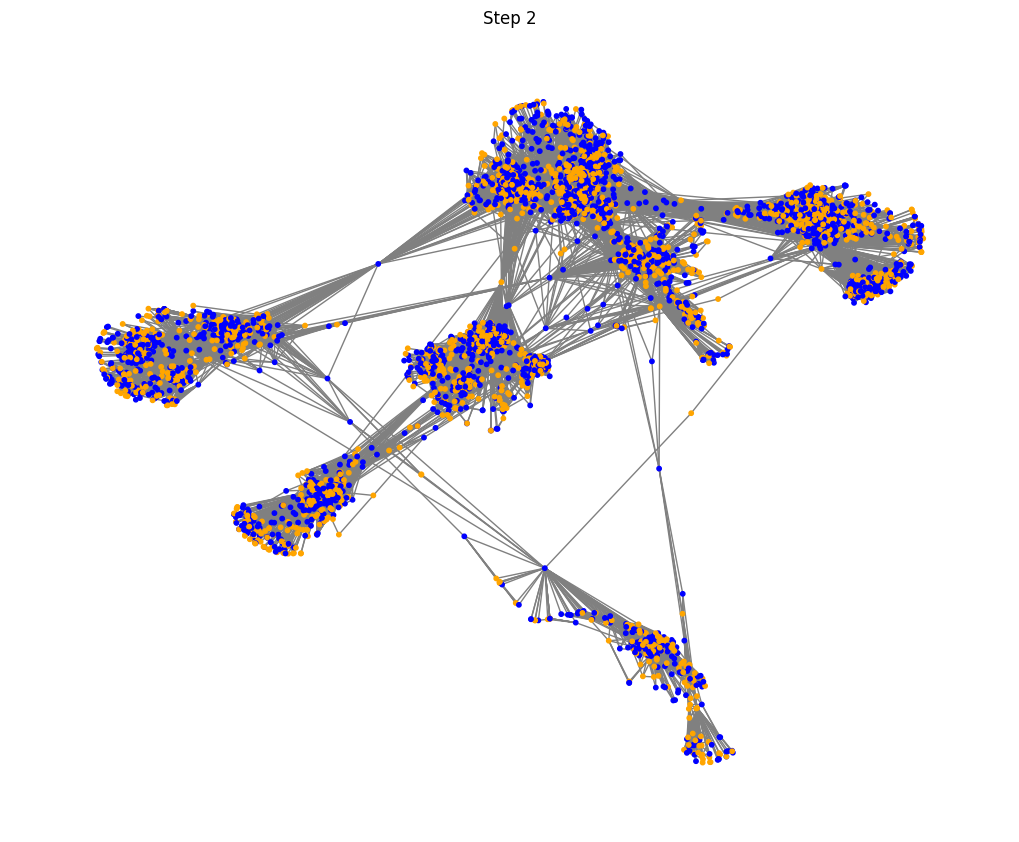

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Load the Facebook dataset
facebook = pd.read_csv(
    "facebook_combined.txt",
    sep=" ",
    names=["start_node", "end_node"]
)

# Create the graph from the dataset
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

# Assign random initial states: "I" (infected) or "S" (susceptible)
state = {node: random.choice(["I", "S"]) for node in G.nodes()}
nx.set_node_attributes(G, state, "state")

# Set probabilities
infection_prob = 0.3  # Probability of infection (0 to 1)
recovery_prob = 0.2  # Probability of recovery (0 to 1)

def update_state(G):
    """ Update the state of each node based on infection and recovery probabilities """
    state = nx.get_node_attributes(G, "state")  # Get current states
    next_state = state.copy()  # Copy current state

    for node in G.nodes():
        if state[node] == "S":  # If the node is susceptible
            infected_neighbors = sum(1 for neighbor in G.neighbors(node) if state[neighbor] == "I")
            if infected_neighbors > 0 and random.random() < infection_prob:
                next_state[node] = "I"  # The node becomes infected

        elif state[node] == "I":  # If the node is infected
            if random.random() < recovery_prob:
                next_state[node] = "S"  # The node recovers

    nx.set_node_attributes(G, next_state, "state")  # Update the graph state

def plot_graph(G, title="Graph State"):
    """ Plot the graph with color-coded states """
    state = nx.get_node_attributes(G, "state")
    color_map = {"I": "blue", "S": "orange"}
    node_colors = [color_map[state[node]] for node in G.nodes()]
    
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)  # Layout for better visualization
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=10, edge_color="gray")
    plt.title(title)
    plt.show()

# Initial plot
plot_graph(G, title="Initial State")

# Simulate multiple steps
for step in range(5):
    update_state(G)
    plot_graph(G, title=f"Step {step+1}")

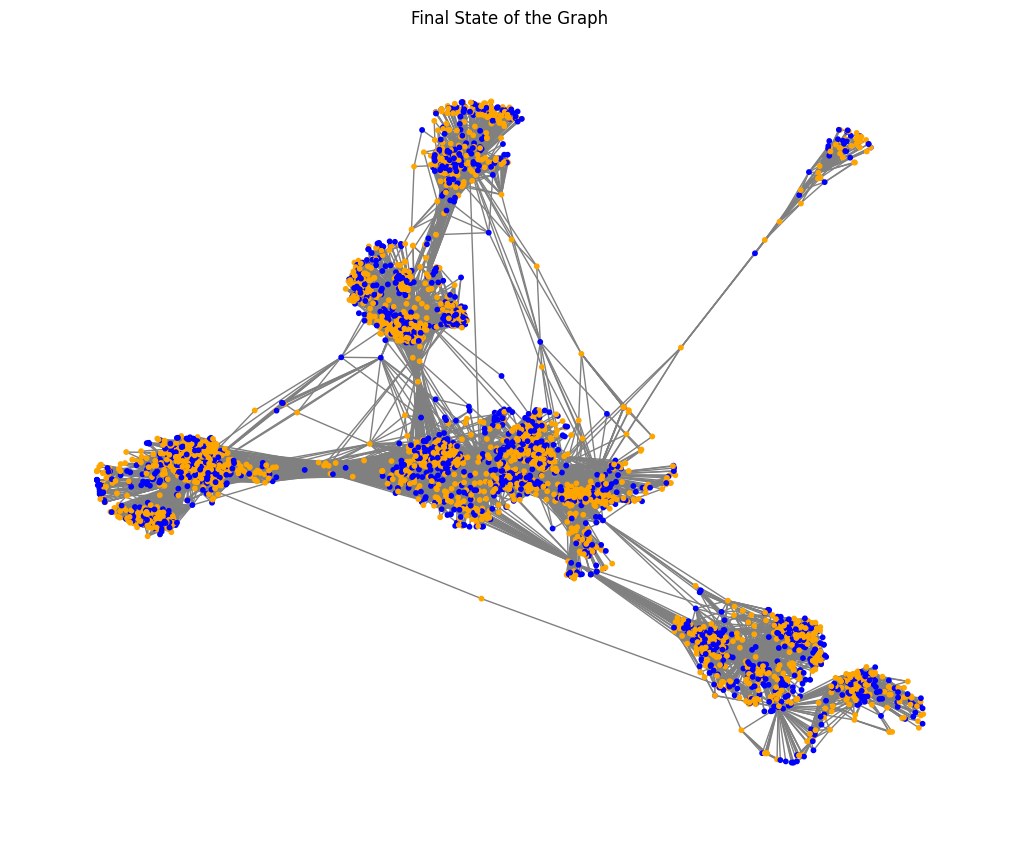

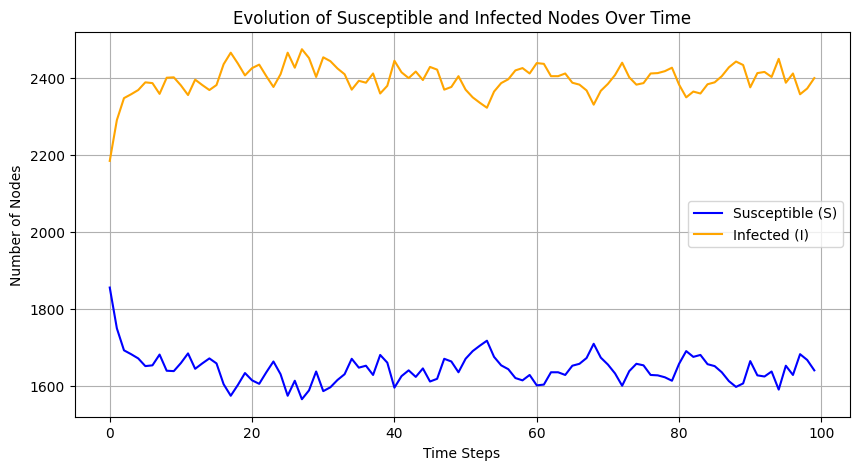

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Load the Facebook dataset
facebook = pd.read_csv(
    "../facebook_combined.txt",
    sep=" ",
    names=["start_node", "end_node"]
)

# Create the graph from the dataset
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

# Assign random initial states: "I" (infected) or "S" (susceptible)
state = {node: random.choice(["I", "S"]) for node in G.nodes()}
nx.set_node_attributes(G, state, "state")

# Set probabilities
infection_prob = 0.3  # Probability of infection (0 to 1)
recovery_prob = 0.2  # Probability of recovery (0 to 1)

def update_state(G):
    """ Update the state of each node based on infection and recovery probabilities """
    state = nx.get_node_attributes(G, "state")  # Get current states
    next_state = state.copy()  # Copy current state

    for node in G.nodes():
        if state[node] == "S":  # If the node is susceptible
            infected_neighbors = sum(1 for neighbor in G.neighbors(node) if state[neighbor] == "I")
            if infected_neighbors > 0 and random.random() < infection_prob:
                next_state[node] = "I"  # The node becomes infected

        elif state[node] == "I":  # If the node is infected
            if random.random() < recovery_prob:
                next_state[node] = "S"  # The node recovers

    nx.set_node_attributes(G, next_state, "state")  # Update the graph state

# Tracking history
num_steps = 100
s_history = []  # Stores the count of susceptible nodes
i_history = []  # Stores the count of infected nodes

for step in range(num_steps):
    update_state(G)  # Update the graph state
    
    # Count the number of S and I nodes
    state = nx.get_node_attributes(G, "state")
    s_count = sum(1 for node in G.nodes() if state[node] == "S")
    i_count = sum(1 for node in G.nodes() if state[node] == "I")
    
    s_history.append(s_count)
    i_history.append(i_count)

# Plot the final state of the graph
plt.figure(figsize=(10, 8))
state = nx.get_node_attributes(G, "state")
color_map = {"I": "orange", "S": "blue"}
node_colors = [color_map[state[node]] for node in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=10, edge_color="gray")
plt.title("Final State of the Graph")
plt.show()

# Plot the evolution of S and I over time
plt.figure(figsize=(10, 5))
plt.plot(range(num_steps), s_history, label="Susceptible (S)", color="blue")
plt.plot(range(num_steps), i_history, label="Infected (I)", color="orange")
plt.xlabel("Time Steps")
plt.ylabel("Number of Nodes")
plt.title("Evolution of Susceptible and Infected Nodes Over Time")
plt.legend()
plt.grid()
plt.show()